In [23]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
data = pd.read_csv("data_2_ml.csv", sep=" ")
data.sample(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
493,5.0,5.0,5.0,5.0,5.0,16957404,Знакомство с графическими редакторами,Профессия Веб-разработчик 9.0,"1. Введение в профессию, вёрстка и дизайн",Профессия Веб-разработчик,1.00,0.00
2293,5.0,5.0,5.0,5.0,5.0,17660092,Урок без имени,Поток без имени,Модуль без имени,Excel для анализа данных,1.00,0.00
2309,4.0,4.0,4.0,4.0,3.0,10951545,Отчетность и метрики тестирования,Профессия инженер по тестированию 30.0 Професс...,Основы тестирования,Профессия QA,0.75,0.25


In [25]:
ratings = ['overall', 'interesting', 'clarity', 'materials', 'tasks']

In [26]:
is_nan_count = data[ratings[1:5]].isna().sum(axis=1).reset_index().drop(
    'index', axis=1)
is_nan_count.columns = ['is_nan']
is_nan_count.groupby(['is_nan'])['is_nan'].count()

is_nan
0    3075
1     269
2      84
3      18
4      10
Name: is_nan, dtype: int64

In [27]:
data_2_ml = data.dropna()
data_2_ml.sample(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
328,4.0,4.0,4.0,4.0,4.0,17677551,Урок без имени,Поток без имени,Модуль без имени,Финансовая грамотность,1.00,0.00
1752,4.0,4.0,3.0,3.0,3.0,16606907,Введение в тест-дизайн. Классы эквивалентности...,Профессия инженер по тестированию 32.0 Професс...,Основы тестирования,Профессия QA,0.25,0.25
3162,1.0,2.0,2.0,2.0,1.0,16802859,Циклы. Урок 2,Профессия Java-разработчик 13.0,Введение в профессию и синтаксис языка,Профессия Java разработчик,0.00,0.25


In [28]:
data_bolean = data_2_ml[[
    'overall', 'interesting', 'clarity', 'materials', 'tasks', 'share45', 'var'
]].copy()
mask = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}
for each in [
        0,
        1,
        2,
        3,
        4,
]:
    data_bolean[ratings[each]] = data_bolean[ratings[each]].map(mask)
data_bolean.sample(3)

,overall,interesting,clarity,materials,tasks,share45,var
3039,1,1,1,1,1,1.00,0.00
2717,1,1,1,1,1,1.00,0.25
1260,1,1,1,0,1,0.75,0.25


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [30]:
X = data_bolean.drop(['overall'], axis=1)
y = data_bolean['overall']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
sensitivities = pd.DataFrame(columns=['test_size', 'acc'])

warnings.filterwarnings('ignore')  # отключаем "розовые бумажки"

for each in range(1, 100, 1):

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=each / 100,
                                                        random_state=4)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    sensitivities = sensitivities.append(
        {'test_size': each, 'acc': acc}, ignore_index=True)

warnings.filterwarnings('default')  # включаем "розовые бумажки"

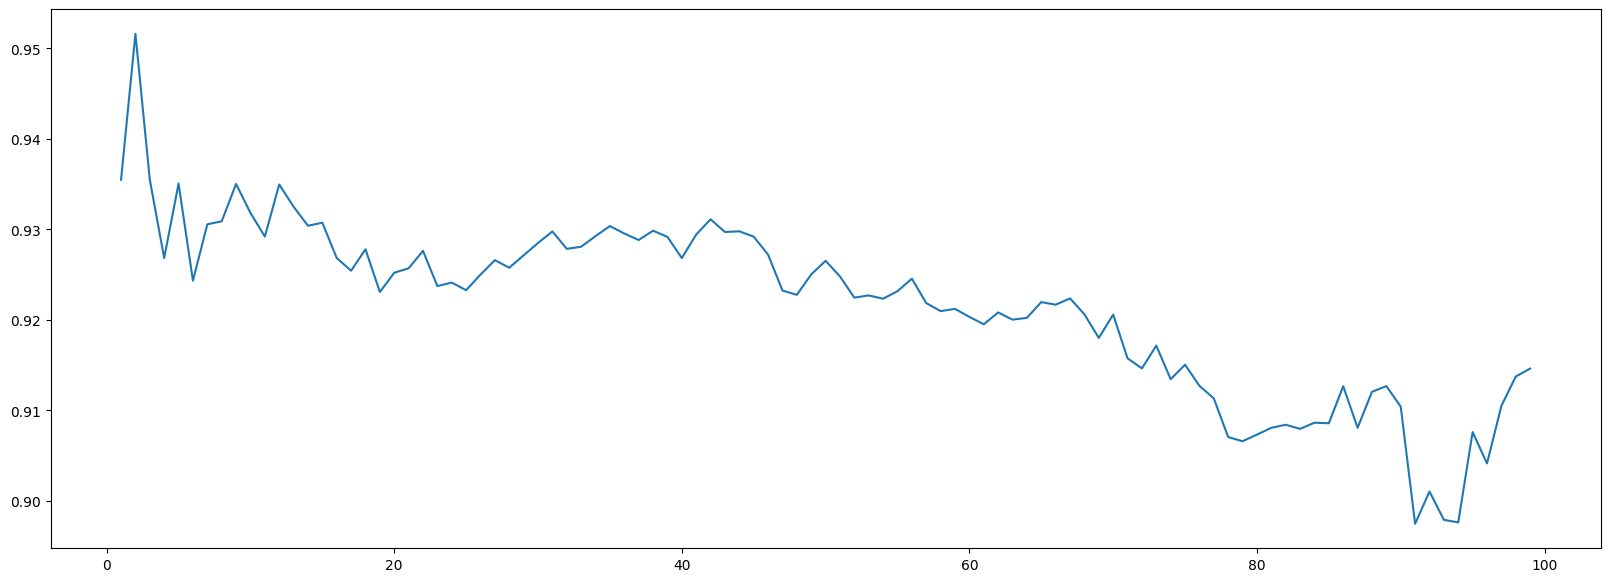

In [33]:
plt.figure(figsize=(20, 7))
plt.plot(sensitivities['test_size'], sensitivities['acc'])
plt.show()

In [34]:
acc = accuracy_score(y_test, y_pred)
f'{acc*100:.1f}%'

'91.5%'

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 266,  208],
       [  52, 2519]], dtype=int64)

<AxesSubplot: >

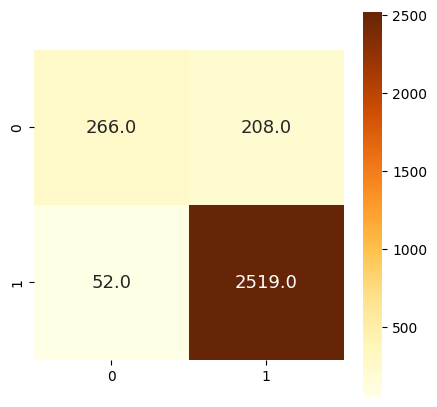

In [36]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot: >

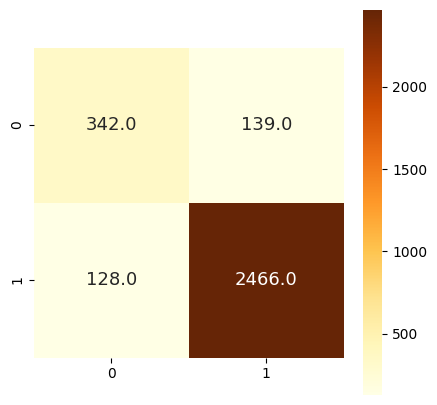

In [37]:
cm_1 = confusion_matrix(data_bolean['overall'], data_bolean['interesting'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_1,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

In [38]:
cm_1

array([[ 342,  139],
       [ 128, 2466]], dtype=int64)

<AxesSubplot: >

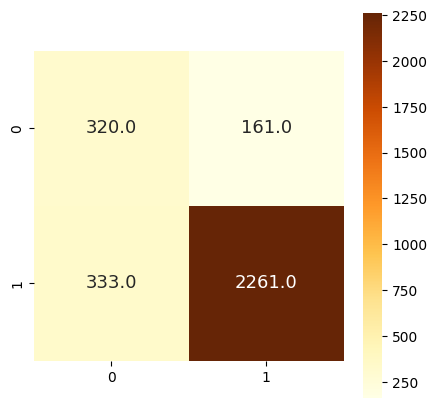

In [39]:
cm_2 = confusion_matrix(data_bolean['overall'], data_bolean['clarity'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_2,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot: >

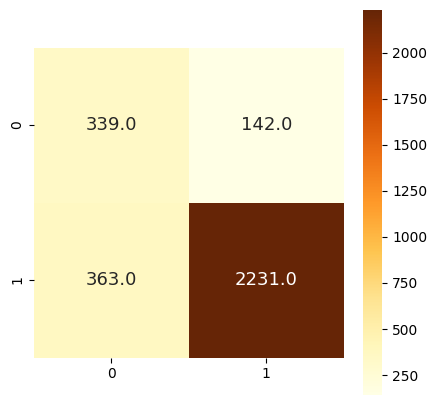

In [40]:
cm_3 = confusion_matrix(data_bolean['overall'], data_bolean['materials'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_3,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

<AxesSubplot: >

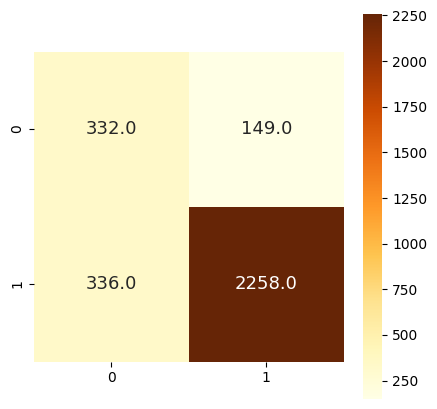

In [41]:
cm_4 = confusion_matrix(data_bolean['overall'], data_bolean['tasks'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm_4,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size': 13},
            cmap='YlOrBr')

In [42]:
con_mat = [cm, cm_1, cm_2, cm_3, cm_4]
i = 0
print('Доля ошибок любого рода: \n')
for each in con_mat:
    print(ratings[i])
    i += 1
    print(
        f'{100 * (each[0][1] + each[1][0]) / (each[0][0] + each[1][1]):7.2f}%\n')

Доля ошибок любого рода: 

overall
   9.34%

interesting
   9.51%

clarity
  19.14%

materials
  19.65%

tasks
  18.73%



In [43]:
data.head(3)

,overall,interesting,clarity,materials,tasks,user_id,lesson_name,stream_name,module_name,course,share45,var
0,4.0,4.0,4.0,4.0,4.0,16024429,Инструменты тестирования,Профессия инженер по тестированию 29.0 Професс...,Тестирование API,Профессия QA,1.00,0.000000
1,3.0,4.0,3.0,3.0,4.0,17679376,Урок без имени,Поток без имени,Модуль без имени,Excel для анализа данных,0.50,0.333333
2,4.0,4.0,5.0,3.0,4.0,11265148,Урок без имени,Поток без имени,Модуль без имени,Профессия Маркетинг на международных рынках,0.75,0.666667


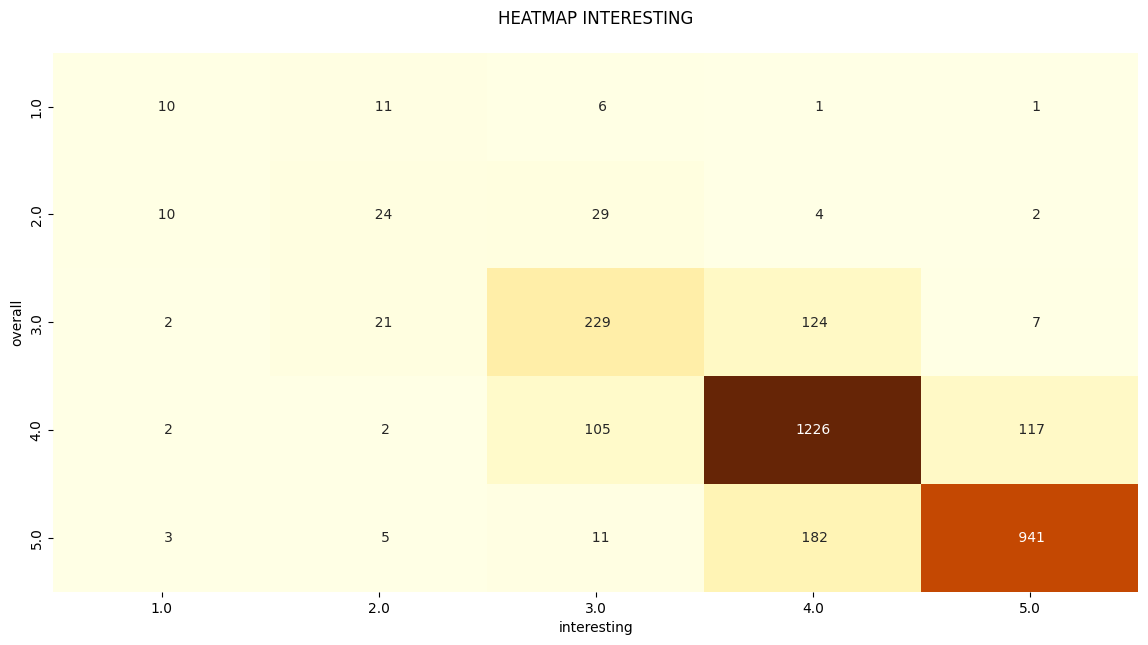

In [44]:
interesting_agg = data.dropna().groupby(['overall', 'interesting'])[
    'user_id'].count().reset_index()

interesting_heatmap = interesting_agg.pivot(index="overall",
                                            columns="interesting",
                                            values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(interesting_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP INTERESTING\n")
plt.ylabel("overall")
plt.xlabel("interesting")
plt.show()

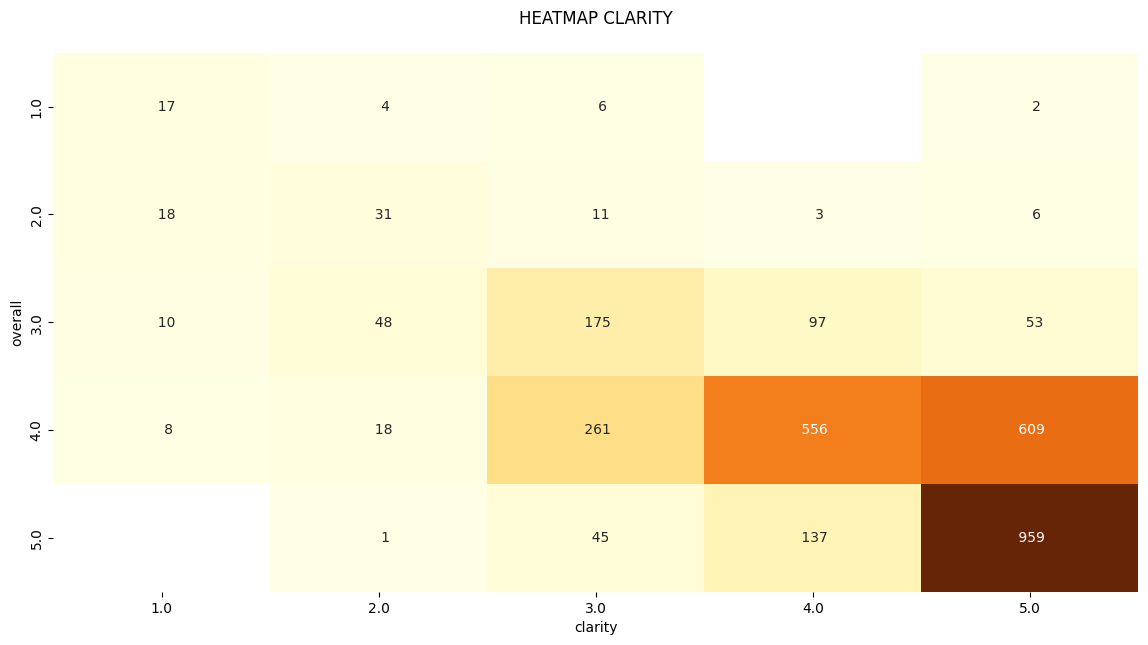

In [45]:
clarity_agg = data.dropna().groupby(['overall', 'clarity'])[
    'user_id'].count().reset_index()

clarity_heatmap = clarity_agg.pivot(index="overall",
                                    columns="clarity",
                                    values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(clarity_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP CLARITY\n")
plt.ylabel("overall")
plt.xlabel("clarity")
plt.show()

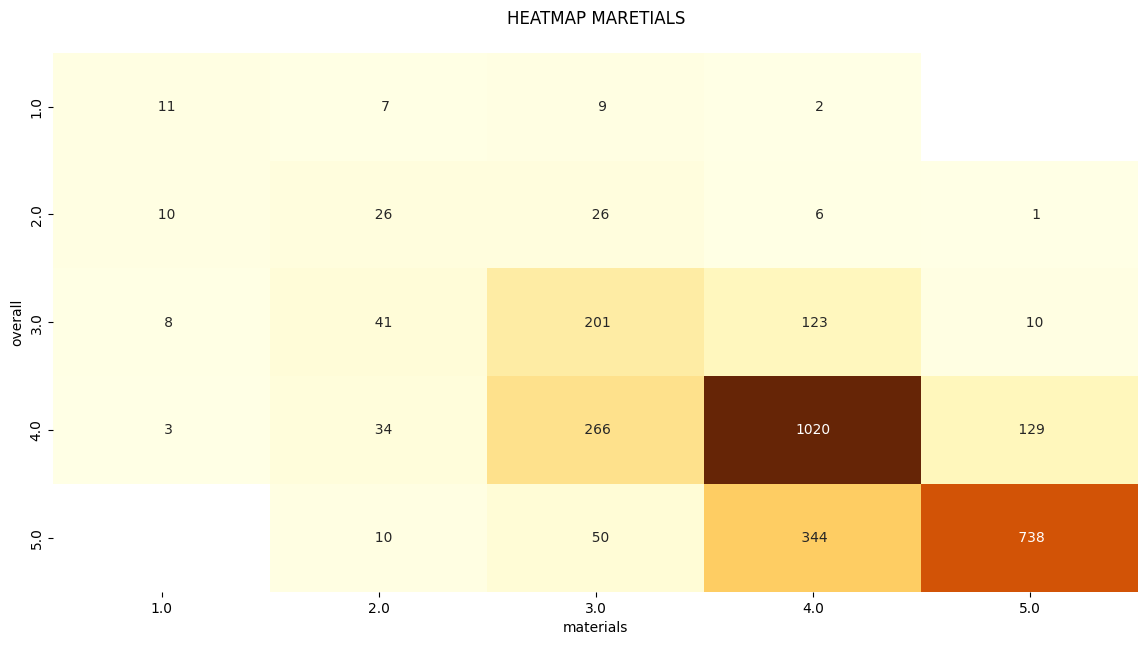

In [46]:
materials_agg = data.dropna().groupby(['overall', 'materials'])[
    'user_id'].count().reset_index()

materials_heatmap = materials_agg.pivot(index="overall",
                                        columns="materials",
                                        values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(materials_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP MARETIALS\n")
plt.ylabel("overall")
plt.xlabel("materials")
plt.show()

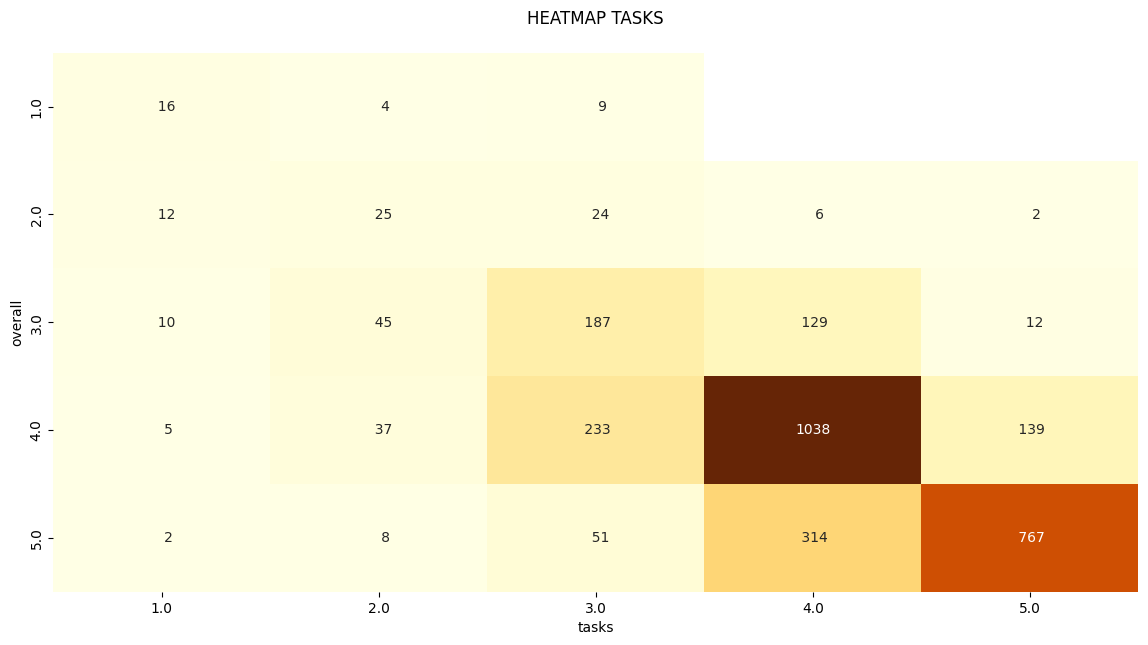

In [47]:
tasks_agg = data.dropna().groupby(['overall', 'tasks'])[
    'user_id'].count().reset_index()

tasks_heatmap = tasks_agg.pivot(index="overall",
                                columns="tasks",
                                values="user_id")

plt.figure(figsize=(14, 7))
sns.heatmap(tasks_heatmap,
            annot=True,
            cmap='YlOrBr',
            fmt='4g',
            cbar=False)
plt.title(f"HEATMAP TASKS\n")
plt.ylabel("overall")
plt.xlabel("tasks")
plt.show()